<a href="https://colab.research.google.com/github/arjunchint/mistral_hackathon/blob/main/Mistral_AI_Hackathon_UI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

******************* End to End UI *******************

In [1]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00


In [3]:
%%writefile app.py

import streamlit as st

st.write('Hello, *World!* :sunglasses:')

Overwriting app.py


In [ ]:
!npm install localtunnel

In [5]:
!streamlit run app.py &>/content/logs.txt &

In [6]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.245.25.163


In [7]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.245.25.163
npx: installed 22 in 1.483s
your url is: https://afraid-states-glow.loca.lt


In [ ]:
!pip install mistralai

####### Report #######
Based on the provided dataset, here's a report on Artesia municipality's performance for the fiscal year 2022:

1. **Financial Overview:**
   - The Net Position of the municipality was $37,746,548, an increase of $6,158,549 from the previous period.
   - Total Revenues were $20,494,101, while Total Expenditures were $14,118,827.
   - The Unassigned Fund Balance was $4,963,307.

2. **Asset and Liability Overview:**
   - Capital Assets were valued at $28,113,887.
   - Long Term Liabilities were $9,064,322, which also represents the Total Debt Outstanding.

3. **Revenue Capacity:**
   - The majority of the governmental activities tax revenues came from Sales Taxes ($5,551,693), followed by Property Taxes ($2,146,321).
   - The Assessed Value of Taxable Property was 96, with Residential use making up 60%, Commercial use 30%, and Industrial use 6%.
   - The Direct and Overlapping Property Tax Rates was 1.05.
   - The principal property taxpayers were John Doe and Jane

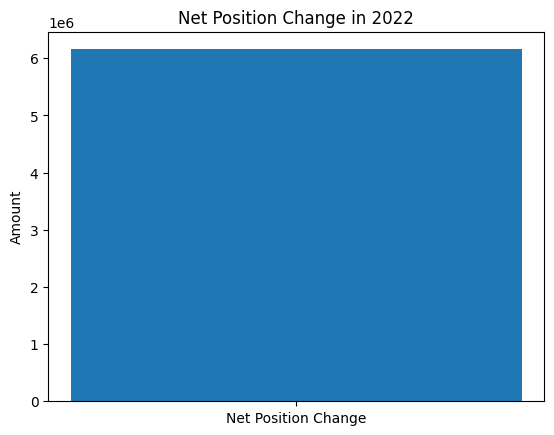

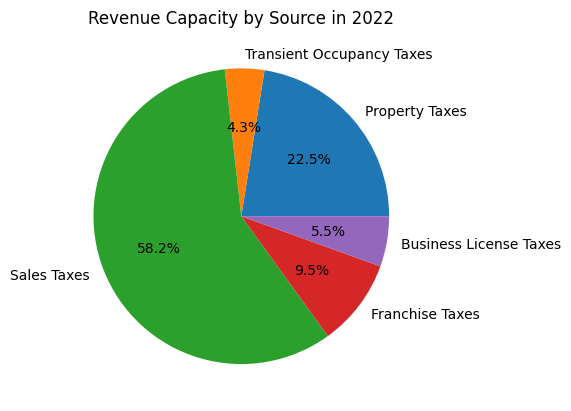

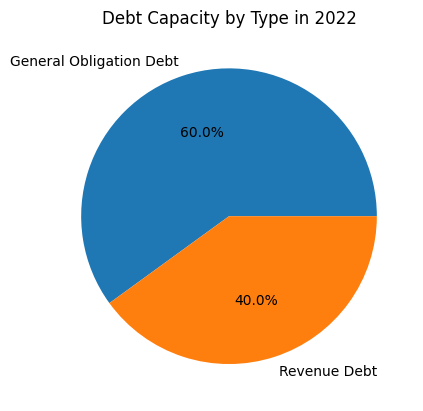

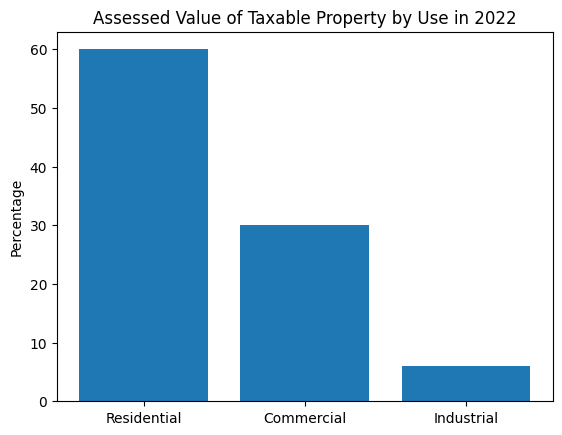

In [97]:
### Quiz generation periodic table ###

from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from google.colab import userdata
import textwrap
import re
import ast

# Get your Mistral API Key from environment variables
api_key=userdata.get('MISTRAL_API_TOKEN')
model = "mistral-large-latest"

client = MistralClient(api_key=api_key)

def extract_python_code(input_string):
  """Extracts Python code blocks within `python and ` markers.

  Args:
      input_string: The input string potentially containing code blocks.

  Returns:
      A list of extracted Python code blocks.
  """

  pattern = r"`python(.*?)`"  # Regex pattern for code blocks
  matches = re.findall(pattern, input_string, flags=re.DOTALL)
  executable_code = str(matches).strip()[1:-1]  # Remove extra '[' and ']'

  # Use ast.literal_eval for safe conversion
  executable_code = ast.literal_eval(executable_code)

  return executable_code


### Example structured input - To be received from Luis' Data Ingestion ####
alphabet_earnings=[
  {
    "Year": "2023",
    "Revenue": 307394,
    "Cost of Revenue": 133332,
    "Net Income": 73795,
    "Diluted EPS": 5.80
  },
  {
    "Year": "2022",
    "Revenue": 282836,
    "Cost of Revenue": 126203,
    "Net Income": 59972,
    "Diluted EPS": 4.56
  },
  {
    "Year": "2021",
    "Revenue": 257637,
    "Cost of Revenue": 110939,
    "Net Income": 76033,
    "Diluted EPS": 4.561
  }
]

artesia_municipality_audit =[
  {
    "Fiscal Year": 2022,
    "Net Position": 37746548,
    "Net Position Change": 6158549,
    "Total Revenues": 20494101,
    "Total Expenditures": 14118827,
    "Unassigned Fund Balance": 4963307,
    "Capital Assets": 28113887,
    "Long Term Liabilities": 9064322,
    "Total Debt Outstanding": 9064322,
    "Revenue Capacity": {
      "Governmental Activities Tax Revenues by Source": {
        "Property Taxes": 2146321,
        "Transient Occupancy Taxes": 410567,
        "Sales Taxes": 5551693,
        "Franchise Taxes": 909908,
        "Business License Taxes": 525901
      },
      "Assessed Value of Taxable Property": 96,
      "Assessed Value of Taxable Property by Use": {
        "Residential": 60,
        "Commercial": 30,
        "Industrial": 6
      },
      "Direct and Overlapping Property Tax Rates": 1.05,
      "Principal Property Taxpayers": [
        "John Doe",
        "Jane Smith"
      ]
    },
    "Debt Capacity": {
      "Ratios of Outstanding Debt by Type": {
        "General Obligation Debt": 0.6,
        "Revenue Debt": 0.4
      },
      "Ratios of General Bonded Debt Outstanding": 0.7,
      "Direct and Overlapping Bonded Debt": 1.2,
      "Legal Debt Margin": 0.3
    }
  }
]

messages = [
    ChatMessage(role="user", content=textwrap.dedent("""\
    Give me a report on Artesia municipality's performance based on the data highlighted in the dataset.
    Here is the dataset:

    """) + str(artesia_municipality_audit))
]


# No streaming
summary = client.chat(
    model=model,
    messages=messages,
)

print("####### Report #######")
final_report = summary.choices[0].message.content
print(summary.choices[0].message.content)


### Code for matlibplot ###

messages = [
    ChatMessage(role="user", content=textwrap.dedent("""\
    Give me Python code to plot graphs for Artesia municipality's performance based on the dataset.
    Here is the dataset:

    """) + str(artesia_municipality_audit))
]

# No streaming
chat_response = client.chat(
    model=model,
    messages=messages,
)

response = chat_response.choices[0].message.content
print("\n ####### Graphs #######")
plots_done = exec(extract_python_code(response))
#print(extract_python_code(response))
#exec(extract_python_code(response))


In [99]:
%%writefile app1.py

import streamlit as st

# Define roles and recommended workflows
roles = ["Finance Analyst", "Teacher"]
# finance_workflows = {
#     "Data Analysis": ["Data Exploration", "Financial Modeling", "Risk Analysis"],
#     "Reporting": ["Financial Statement Generation", "Market Research Reports", "Investment Proposals"]
# }
# teacher_workflows = {
#     "Lesson Planning": ["Content Curation", "Interactive Activities", "Assessment Creation"],
#     "Grading & Feedback": ["Automated Grading", "Personalized Feedback", "Progress Tracking"]
# }

finance_workflows = ["Market Research Reports", "Investment Proposals", "Data Exploration", "Financial Modeling", "Risk Analysis", "Financial Statement Generation"]
teacher_workflows = ["Assessment Creation", "Content Curation", "Interactive Activities", "Automated Grading"]

llm_workflows = {
    "Market Research Reports": ["Data Extraction", "Data Ingestion", "Report"],
    "Investment Proposals":  ["Data Extraction", "Data Ingestion", "Report"],
    "Data Exploration": ["Data Extraction", "Data Ingestion", "Question"],
    "Assessment Creation": ["Data Extraction", "Data Ingestion", "Quiz Generation"],
    "Content Curation": ["Data Extraction", "Data Ingestion", "Content Generation"]
}

def get_recommended_workflows(role):
    if role == "Finance Analyst":
        return finance_workflows
    elif role == "Teacher":
        return teacher_workflows
    else:
        return None

def get_click_handler(tile):
    if tile == "Data Extraction":
        return data_extraction_handler
    elif tile == "Data Ingestion":
        return data_ingestion_handler
    elif tile == "Report":
        return report_generation_handler
    elif tile == "Execute":
        return execute_workflow_handler
    # ... add more cases for other tiles


def data_extraction_handler():
    st.write("You clicked 'Data Extraction'")

def data_extraction_handler():
    query_or_endpoint = st.text_input("Enter query or endpoint", key="data_extraction_input")
    if query_or_endpoint:
        with st.spinner("Extracting data..."):  # Add a loading indicator
            output = llm_data_extraction(query_or_endpoint)
        st.subheader("LLM Output")
        st.write(output)

def llm_data_extraction(input):
    # ... Implement your LLM data extraction logic here
    # For now, let's simulate the extraction process
    #response = chat_response.choices[0].message.content
   # print("\n ####### Graphs #######")
    #exec(extract_python_code(response))
    return final_report + "\n" +  plots_done


def data_ingestion_handler():
    st.write("You clicked 'Data Ingestion'")

def report_generation_handler():
    st.write("You clicked 'Report Generation'")

def execute_workflow_handler():
    st.write("You clicked 'Execute Workflow'")

# ... and so on for other tiles

def move_tile(tile):
    for i, placeholder_tile in enumerate(st.session_state['workflow_state']):
        if placeholder_tile is None:
            st.session_state['workflow_state'][i] = tile
            return

def display_workflow(placeholder1, placeholder2, placeholder3):
    print("in 1: ", st.session_state)
    placeholders = [placeholder1, placeholder2, placeholder3]
    for placeholder, tile in zip(placeholders, st.session_state['workflow_state']):
        with placeholder:
            if tile:
                st.button(tile)

def display_workflow_tiles(selected_workflow):
    if selected_workflow in llm_workflows:
        st.subheader("Workflow Blocks")
        tiles = llm_workflows[selected_workflow]
        st.columns(len(tiles))  # Create columns dynamically
        for tile in tiles:
            st.button(selected_workflow+" : "+tile, on_click=get_click_handler(tile))  # Create a button for each tile
        st.button(selected_workflow+" : "+ "Execute", on_click=get_click_handler("Execute"))
    else:
        st.write("Selected workflow not found.")

def display_playground(workflow):
    # Simulate playground functionality for demonstration purposes
    st.subheader("Drag & Drop LLM blocks in the playground")
    display_workflow_tiles(workflow)

def main():
    st.title("Build your custom LLM Workflow")

    # User role selection
    selected_role = st.selectbox("Select your role", roles)

    # Display recommended workflows based on role
    recommended_workflows = get_recommended_workflows(selected_role)
    if recommended_workflows:
        st.header("Recommended LLM Workflows")
        for workflow in recommended_workflows:
            with st.expander(workflow):  # Each workflow title as expander
                #selected_block = st.selectbox("Select a workflow", workflow)
                display_playground(workflow)  # Pass workflow blocks
    else:
        st.write("No workflows found for selected role.")

if __name__ == "__main__":
    main()

Overwriting app1.py


In [100]:
!streamlit run app1.py &>/content/logs.txt &

In [101]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.245.25.163
npx: installed 22 in 1.714s
your url is: https://tough-cooks-follow.loca.lt
